In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# constantes das pastas de treino e validação
train_dir = 'train_data/'
val_dir = 'val_data/'

In [3]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.2, rotation_range=120, horizontal_flip=True, validation_split=0.2, rescale = 1./255,)
val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,)

train_dataset = train_data_gen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical', subset='training')
val_dataset = train_data_gen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical', subset='validation')


test_dataset = val_data_gen.flow_from_directory(val_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')


Found 2104 images belonging to 5 classes.
Found 524 images belonging to 5 classes.
Found 660 images belonging to 5 classes.


In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size=(5, 5), activation='relu', strides=(1,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.1))

model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size=(3, 3), activation='relu', strides=(1,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=(2, 2), activation='relu', strides=(1,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 64, activation='relu'))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(units = 5, activation='softmax', name = 'saida'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 64, 64, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 30, 30, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)       

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [6]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'max', patience = 10)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks = [early_stopping])


Epoch 1/100


66/66 [==============================] - 92s 1s/step - loss: 1.1556 - accuracy: 0.5005 - val_loss: 1.3615 - val_accuracy: 0.5668
Epoch 2/100
66/66 [==============================] - 82s 1s/step - loss: 0.8084 - accuracy: 0.6692 - val_loss: 1.0160 - val_accuracy: 0.6985
Epoch 3/100
66/66 [==============================] - 131s 2s/step - loss: 0.6702 - accuracy: 0.7324 - val_loss: 0.7692 - val_accuracy: 0.7595
Epoch 4/100
66/66 [==============================] - 79s 1s/step - loss: 0.6303 - accuracy: 0.7628 - val_loss: 0.6135 - val_accuracy: 0.7977
Epoch 5/100
66/66 [==============================] - 78s 1s/step - loss: 0.5897 - accuracy: 0.7681 - val_loss: 0.5312 - val_accuracy: 0.8111
Epoch 6/100
66/66 [==============================] - 80s 1s/step - loss: 0.5851 - accuracy: 0.7643 - val_loss: 0.5327 - val_accuracy: 0.7863
Epoch 7/100
66/66 [==============================] - 101s 2s/step - loss: 0.5940 - accuracy: 0.7529 - val_loss: 0.4616 - val_accuracy: 0.8149
Epoch 8/1

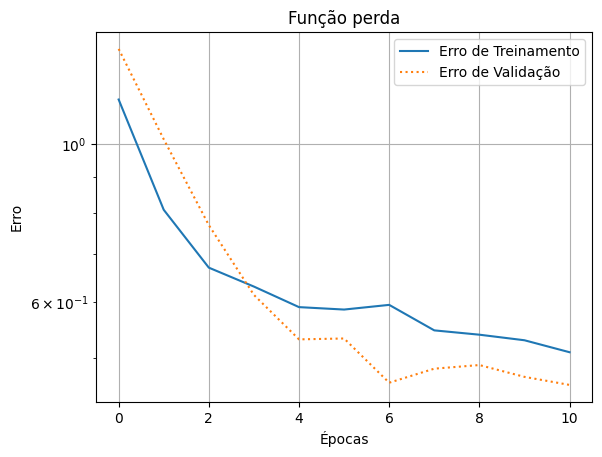

In [22]:
# Visualizando o ERRO de treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], ':')
plt.title('Função perda')
plt.yscale('log')
plt.ylabel('Erro')
plt.xlabel('Épocas')
plt.legend(['Erro de Treinamento', 'Erro de Validação'])
plt.grid(True)
plt.show()


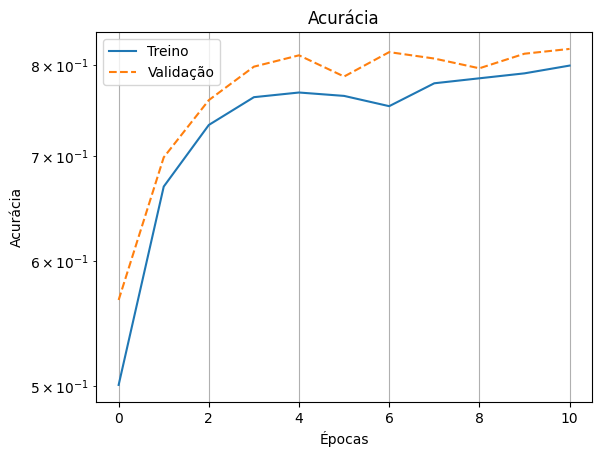

In [8]:
# Plotando o treinamento e a validação da accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '--')
plt.yscale("log")
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Validação'])
plt.grid(True)
plt.show()

In [9]:
# Previsões do modelo no conjunto de validação
val_predictions = model.predict(val_dataset)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Rótulos verdadeiros do conjunto de validação
val_true_classes = val_dataset.classes

17/17 [==============================] - 7s 397ms/step


In [10]:
# Calcular acurácia
accuracy = accuracy_score(val_true_classes, val_pred_classes)
print("Acurácis:", accuracy)

Acurácia (Accuracy): 0.1946564885496183


In [11]:
# Calcular precisão
precision = precision_score(val_true_classes, val_pred_classes, average='macro')
print("Precisão:", precision)

Precisão (Precision): 0.19343254997832032


In [12]:
# Calcular recall
recall = recall_score(val_true_classes, val_pred_classes, average='macro')
print("Recall:", recall)

Recall: 0.19526055074158427


In [13]:
# Calcular F1 score
#f1 = f1_score(val_true_classes, val_pred_classes, average='macro')
#print("F1 Score:", f1)

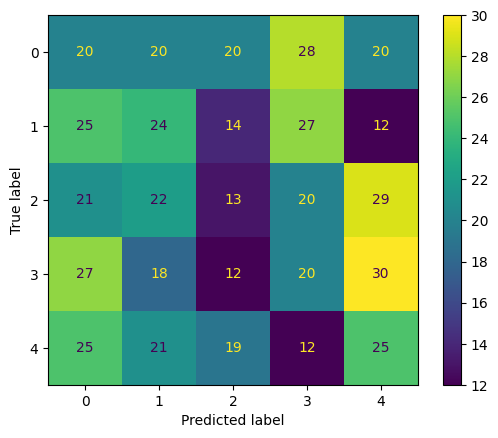

In [14]:
# Calcular e exibir a matriz de confusão
cm = confusion_matrix(val_true_classes, val_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [15]:
class_mapping = train_dataset.class_indices
print(class_mapping)


{'10': 0, '100': 1, '25': 2, '5': 3, '50': 4}


In [16]:
# Testando o modelo
teste_image_path = 'moeda.jpg'  # Substitua pelo caminho da sua imagem de teste
teste_image = tf.keras.preprocessing.image.load_img(teste_image_path, target_size=(64, 64))
teste_image_array = tf.keras.preprocessing.image.img_to_array(teste_image)
teste_image_array = np.expand_dims(teste_image_array, axis=0)  # Adiciona uma dimensão para representar o lote (batch)

# Normaliza a imagem
#teste_image_array /= 255.0

# Predição
saida_predita = model.predict(teste_image_array)

print('Saída Preditada:', saida_predita)

1/1 [==============================] - 0s 325ms/step
Saída Preditada: [[0. 0. 0. 1. 0.]]


In [17]:
# Mapeamento de números de classe para nomes de classe
class_name = {
    0: "Moeda de 5 centavos",
    1: "Moeda de 10 centavos",
    2: "Moeda de 25 centavos",
    3: "Moeda de 50 centavos",
    4: "Moeda de 1 real"
}

# Obtém o número da classe prevista
classe_prevista = np.argmax(saida_predita)

# Obtém o nome da classe prevista usando o mapeamento
nome_classe_prevista = class_name[classe_prevista]

print('Classe Prevista:', nome_classe_prevista)


Classe Prevista: Moeda de 50 centavos


In [18]:
# Gerar previsões no conjunto de validação
saida_predida_test = model.predict(test_dataset)

# Exibir as primeiras 5 previsões
print(saida_predida_test[:5])


21/21 [==============================] - 11s 499ms/step
[[2.7796721e-05 5.8636311e-07 3.0751828e-05 3.2381893e-05 9.9990845e-01]
 [8.7118032e-04 4.2988890e-04 9.6410466e-04 7.8832702e-04 9.9694663e-01]
 [2.8596524e-04 9.9926513e-01 2.9871118e-04 6.0758957e-05 8.9434034e-05]
 [8.4786889e-06 9.9992514e-01 4.5597910e-05 1.9129238e-05 1.7051093e-06]
 [6.7372090e-01 4.6167747e-04 2.6403365e-01 6.0842022e-02 9.4177440e-04]]


In [23]:
model.save('mode_acurracy82.h5')

c:\Users\BRUNO WELL\Desktop\contador de moedas real\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
#dados = pd.DataFrame(history.history)
#dados.head()

In [21]:
#dados.to_csv('loss.csv')